In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read .csv file..
nyc=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

In [3]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [4]:
#dropping list of unwanted columns in data frame.
nyc=nyc.drop(columns=['Landmark','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name'],axis=1)

In [5]:
nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
#checking type of date column
nyc['Created Date'].dtype
nyc['Closed Date'].dtype

dtype('O')

In [7]:
#Changing 'Created date' and 'closed date' column type from object to datetime64 type..

nyc['Closed Date']=pd.to_datetime(nyc['Closed Date'])
nyc['Created Date']=pd.to_datetime(nyc['Created Date'])


In [8]:
print(nyc['School Address'].value_counts())
print(nyc['School City'].value_counts())
print(nyc['School Code'].value_counts())
print(nyc['School State'].value_counts())





Unspecified                                     300697
Grand Central Parkway, near the soccer field         1
Name: School Address, dtype: int64
Unspecified    300697
QUEENS              1
Name: School City, dtype: int64
Unspecified    300697
Name: School Code, dtype: int64
Unspecified    300697
NY                  1
Name: School State, dtype: int64


In [9]:
#Dropping columns having most unspecified values..
nyc=nyc.drop(columns=['School Address','School City','School Code','School State'],axis=1)

In [10]:
nyc=nyc.drop(columns=['School Number','School Region','School Phone Number','School Zip','School Not Found','School or Citywide Complaint'],axis=1)

In [11]:
diff=(nyc['Closed Date'][i]-nyc['Created Date'][i] for i in range(0,nyc['Closed Date'].count()))
    


In [12]:
nyc['Request_Closing_Time']=pd.DataFrame(diff)

In [13]:
p=[]

In [14]:
for i in range(0,nyc['Request_Closing_Time'].count()):
    s=(nyc['Request_Closing_Time'][i].seconds)/60
    p.append(s)
              


In [15]:
nyc['Request_Closing_Time']=pd.DataFrame(p)


In [35]:
nyc.groupby(['City','Complaint Type'])['Request_Closing_Time'].mean()

City      Complaint Type         
ARVERNE   Animal Abuse               129.217544
          Blocked Driveway           151.558095
          Derelict Vehicle           178.093210
          Disorderly Youth           215.475000
          Drinking                    14.316667
                                        ...    
Woodside  Blocked Driveway           384.372727
          Derelict Vehicle           298.000000
          Illegal Parking            300.178866
          Noise - Commercial         143.650000
          Noise - Street/Sidewalk    204.676667
Name: Request_Closing_Time, Length: 764, dtype: float64

In [16]:
complaint_top_10=nyc['Complaint Type'].value_counts()[:10]

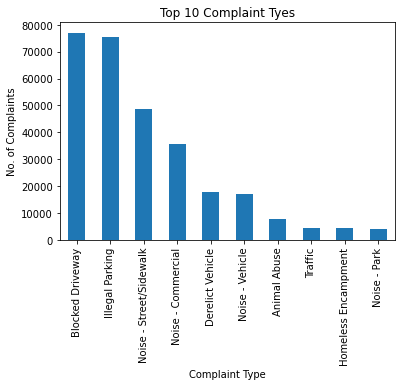

In [17]:
complaint_top_10.plot(kind='bar',title='Top 10 Complaint Tyes')
plt.xlabel('Complaint Type')
plt.ylabel('No. of Complaints')
plt.show()

In [18]:
top_complaint_location=nyc['Location Type'].value_counts()[:5]

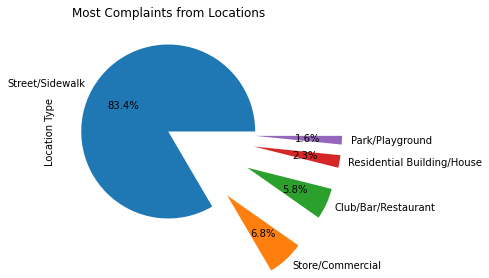

In [19]:
top_complaint_location.plot(kind='pie',autopct='%1.1f%%',explode=[0,1,1,1,1])
plt.title('Most Complaints from Locations')
plt.show()

In [20]:
top_cities=nyc['City'].value_counts()[:10].index
complaint=nyc['Complaint Type'].value_counts()[:5].index

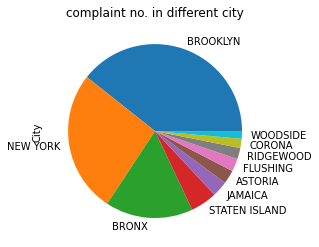

In [23]:
nyc['City'].value_counts()[:10].plot(kind='pie')
plt.title('complaint no. in different city')
plt.show()

In [24]:
top_cities=top_cities.to_list()

In [25]:
complaint=complaint.to_list()

In [26]:
complaint

['Blocked Driveway',
 'Illegal Parking',
 'Noise - Street/Sidewalk',
 'Noise - Commercial',
 'Derelict Vehicle']

In [27]:
nyc['Complaint_Type']=nyc['Complaint Type']

In [28]:
l=nyc[(nyc.Complaint_Type.isin(complaint))&(nyc.City.isin(top_cities))]

In [29]:
listb=[]
for i in top_cities:
    lista=[i]
    for j in complaint:
       lista.append(l[l['City']==i][l['Complaint Type']==j].shape[0])
    listb.append(lista)
    

C:\Users\dell\AppData\Local\Temp/ipykernel_6288/2790627258.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lista.append(l[l['City']==i][l['Complaint Type']==j].shape[0])


In [30]:
listb

[['BROOKLYN', 28148, 27462, 13356, 11463, 5181],
 ['NEW YORK', 2072, 12128, 20433, 14550, 537],
 ['BRONX', 12755, 7859, 8892, 2434, 1953],
 ['STATEN ISLAND', 2142, 4886, 819, 678, 1766],
 ['JAMAICA', 2818, 1421, 339, 429, 954],
 ['ASTORIA', 2618, 1068, 386, 1293, 351],
 ['FLUSHING', 2795, 1829, 225, 175, 440],
 ['RIDGEWOOD', 1694, 1842, 433, 398, 330],
 ['CORONA', 2761, 660, 238, 248, 57],
 ['WOODSIDE', 1613, 891, 250, 209, 247]]

In [31]:
complaint.insert(0,'city')

In [32]:
ddf=pd.DataFrame(listb)

In [33]:
ddf.columns=complaint

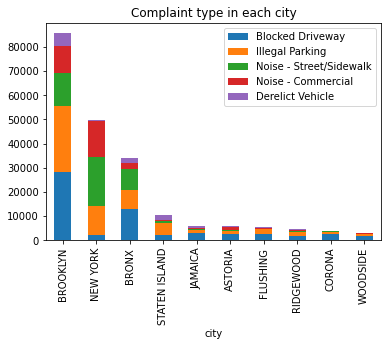

In [34]:
p=ddf.plot(x='city',kind='bar',stacked=True,title='Complaint type in each city')
plt.show()

### TEST1

#Null hypothesis-- H0--> the average response time in days is same for different complaint types.
#Alternate hypothesis-- H1--> the average response time in days is not same for different complaint types.

In [36]:
#dataframe for top 5 complaints
df1=nyc[nyc['Complaint Type']=='Blocked Driveway']
df2=nyc[nyc['Complaint Type']=='Illegal Parking']
df3=nyc[nyc['Complaint Type']=='Noise - Street/Sidewalk']
df4=nyc[nyc['Complaint Type']=='Noise - Commercial']
df5=nyc[nyc['Complaint Type']=='Derelict Vehicle']

In [39]:
r1=df1['Request_Closing_Time'].dropna()
r2=df2['Request_Closing_Time'].dropna()
r3=df3['Request_Closing_Time'].dropna()
r4=df4['Request_Closing_Time'].dropna()
r5=df5['Request_Closing_Time'].dropna()


In [41]:
import scipy.stats as stat

In [42]:
stat.f_oneway(r1,r2,r3,r4,r5)  #annova test

F_onewayResult(statistic=2052.843483423452, pvalue=0.0)

Null Hypothesis is Rejected as pvalue is zero(apprx).

In [44]:
city_top5=nyc[nyc['Complaint Type'].isin(nyc['Complaint Type'].value_counts()[:5].index)]

In [45]:
city_comp=pd.crosstab(city_top5['City'],city_top5['Complaint Type'])

In [46]:
city_comp

Complaint Type,Blocked Driveway,Derelict Vehicle,Illegal Parking,Noise - Commercial,Noise - Street/Sidewalk
City,,,,,
ARVERNE,35,27,58,2,29
ASTORIA,2618,351,1068,1293,386
Astoria,116,12,213,262,114
BAYSIDE,377,198,514,40,15
BELLEROSE,95,89,106,37,13
BREEZY POINT,3,3,15,4,1
BRONX,12755,1953,7859,2434,8892
BROOKLYN,28148,5181,27462,11463,13356
CAMBRIA HEIGHTS,147,115,76,12,25


In [ ]:
# Chi square test is for finding relation between categorical values(city and complaint type)

# h0: the city and the complaint type is independent of each other

# ha: the city and the complaint type is not independent of each other

In [47]:
chi2_stats,pvalue,df,mean_val=stats.chi2_contingency(city_comp)

In [48]:
chi2_stats

72968.04166267907

In [49]:
df

208

In [52]:
pvalue

0.0

## null hypothesis is rejected
## it means that, the 'city' and the 'complaint type' is not independent of each other.